# Data set split: Test size 20% Training size 80%
# PCA not performed

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC  ## Import SVC
from sklearn import svm
from sklearn.metrics import f1_score
from pandas.plotting import scatter_matrix
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline  
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

accent_dataset = pd.read_csv("accent-mfcc-data-1.csv")
#collect datatset

# --- Model Development ---

# 1) KNN 

### without any neighbors

In [28]:
accent_dataset['isUS'] = [True if l == 'US' else False for l in accent_dataset['language']]
X = accent_dataset.drop(['language', 'isUS'], axis=1)
y = accent_dataset['isUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
m_knn = KNeighborsClassifier()
m_knn.fit(X_train,y_train)
y_pred = m_knn.predict(X_train)

In [29]:
print(confusion_matrix(y_train, y_pred))

[[129   3]
 [ 11 120]]


In [30]:
y_pred = m_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[28  4]
 [ 2 32]]


In [31]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred, target_names = ['Not US','Is US'], digits = 4))

              precision    recall  f1-score   support

      Not US     0.9333    0.8750    0.9032        32
       Is US     0.8889    0.9412    0.9143        34

    accuracy                         0.9091        66
   macro avg     0.9111    0.9081    0.9088        66
weighted avg     0.9104    0.9091    0.9089        66



## Observation for KNN without any neighbors:
accuracy of model is high 0.90 with considering any neighbors

## KNN with neighbors

In [32]:
for i in range(1, 10):
        print("=================================================== \n")
        knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=i) 
        knn_clf.fit(X_train ,y_train)
        knn_pred = knn_clf.predict(X_test)
        accuracy_score(y_test, knn_pred)
        print("Value of neighbors :", i)
        print(classification_report(y_test, knn_pred, target_names = ['Not US','Is US'], digits = 7))


Value of neighbors : 1
              precision    recall  f1-score   support

      Not US  0.8529412 0.9062500 0.8787879        32
       Is US  0.9062500 0.8529412 0.8787879        34

    accuracy                      0.8787879        66
   macro avg  0.8795956 0.8795956 0.8787879        66
weighted avg  0.8804033 0.8787879 0.8787879        66


Value of neighbors : 2
              precision    recall  f1-score   support

      Not US  0.7692308 0.9375000 0.8450704        32
       Is US  0.9259259 0.7352941 0.8196721        34

    accuracy                      0.8333333        66
   macro avg  0.8475783 0.8363971 0.8323713        66
weighted avg  0.8499525 0.8333333 0.8319865        66


Value of neighbors : 3
              precision    recall  f1-score   support

      Not US  0.8484848 0.8750000 0.8615385        32
       Is US  0.8787879 0.8529412 0.8656716        34

    accuracy                      0.8636364        66
   macro avg  0.8636364 0.8639706 0.8636051        66
we

## Observation for KNN with neighbors- 
KNN works well when number of neighbours = 5 or 7
The precision fot the two classes changes with 5 and 7

With KNN = 5, F1 score for not-US is more than it is for KNN=7
Check what F1 score means

# 2) LOGISTIC REGRESSION

In [33]:
import sklearn.linear_model as skl_lm
log_clf = skl_lm.LogisticRegression(solver='newton-cg')

In [34]:
log_clf.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [35]:
log_pred = log_clf.predict(X_test)

In [36]:
accuracy_score(y_test, log_pred)

0.803030303030303

In [37]:
print(classification_report(y_test,log_pred, target_names = ['Not US','Is US'], digits = 7))

              precision    recall  f1-score   support

      Not US  0.7714286 0.8437500 0.8059701        32
       Is US  0.8387097 0.7647059 0.8000000        34

    accuracy                      0.8030303        66
   macro avg  0.8050691 0.8042279 0.8029851        66
weighted avg  0.8060885 0.8030303 0.8028946        66



## Using scaling in log reg - Not needed
Note: Used to scaling to check accuracy of the model

In [38]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [39]:
log_clf.fit(X_train_scaled,y_train)

LogisticRegression(solver='newton-cg')

In [40]:
log_pred_scaled = log_clf.predict(X_test)

/home/pushkar/my_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [41]:
accuracy_score(y_test, log_pred_scaled)

0.6363636363636364

## Checked accuracy with solver liblinear of logistic regression

In [42]:
import sklearn.linear_model as skl_lm
log_clf = skl_lm.LogisticRegression(solver='liblinear')
log_clf.fit(X_train,y_train)
log_pred = log_clf.predict(X_test)
log_pred_train = log_clf.predict(X_train)
accuracy_score(y_test, log_pred)
print(classification_report(y_test,log_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : ", confusion_matrix(y_train, log_pred_train))
print("confusion matrix for y test is : ", confusion_matrix(y_test, log_pred))
print("accuracy score for training : ", accuracy_score(y_train, log_pred_train))

              precision    recall  f1-score   support

      Not US  0.8000000 0.8750000 0.8358209        32
       Is US  0.8709677 0.7941176 0.8307692        34

    accuracy                      0.8333333        66
   macro avg  0.8354839 0.8345588 0.8332951        66
weighted avg  0.8365591 0.8333333 0.8332185        66

confusion matrix for y train is :  [[108  24]
 [ 38  93]]
confusion matrix for y test is :  [[28  4]
 [ 7 27]]
accuracy score for training :  0.7642585551330798


## Observation for Logistic regression:
We can see better accuracy with liblinear solver compared to that of newton-cg

## Checked accuracy with solver newton-cg of logistic regression

In [43]:
log_clf = skl_lm.LogisticRegression(solver='newton-cg')
log_clf.fit(X_train,y_train)
log_pred = log_clf.predict(X_test)
log_pred_train = log_clf.predict(X_train)
accuracy_score(y_test, log_pred)
print(classification_report(y_test,log_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : ", confusion_matrix(y_train, log_pred_train))
print("confusion matrix for y test is : ", confusion_matrix(y_test, log_pred))
print("accuracy score for training : ", accuracy_score(y_train, log_pred_train))

              precision    recall  f1-score   support

      Not US  0.7714286 0.8437500 0.8059701        32
       Is US  0.8387097 0.7647059 0.8000000        34

    accuracy                      0.8030303        66
   macro avg  0.8050691 0.8042279 0.8029851        66
weighted avg  0.8060885 0.8030303 0.8028946        66

confusion matrix for y train is :  [[111  21]
 [ 36  95]]
confusion matrix for y test is :  [[27  5]
 [ 8 26]]
accuracy score for training :  0.7832699619771863


# 3) Linear Discriminant Analysis (LDA)
Note: checked accuaracy of LDA with different solver

In [44]:
lda_clf = LinearDiscriminantAnalysis(solver='svd')
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
accuracy_score(y_test, lda_pred)
lda_pred_train = lda_clf.predict(X_train)
print(classification_report(y_test,lda_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : \n", confusion_matrix(y_train, lda_pred_train))
print("confusion matrix for y test is : \n", confusion_matrix(y_test, lda_pred))
print("accuracy score for training : \n", accuracy_score(y_train, lda_pred_train))



              precision    recall  f1-score   support

      Not US  0.7631579 0.9062500 0.8285714        32
       Is US  0.8928571 0.7352941 0.8064516        34

    accuracy                      0.8181818        66
   macro avg  0.8280075 0.8207721 0.8175115        66
weighted avg  0.8299727 0.8181818 0.8171764        66

confusion matrix for y train is : 
 [[104  28]
 [ 39  92]]
confusion matrix for y test is : 
 [[29  3]
 [ 9 25]]
accuracy score for training : 
 0.7452471482889734


# Observation LDA:
Accuracy and other parameters are same for svd, lsqr and eigen solvers

### LDA with solver 'lsqr'

In [45]:
lda_clf = LinearDiscriminantAnalysis(solver='lsqr')
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
accuracy_score(y_test, lda_pred)
lda_pred_train = lda_clf.predict(X_train)
print(classification_report(y_test,lda_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : \n", confusion_matrix(y_train, lda_pred_train))
print("confusion matrix for y test is : \n", confusion_matrix(y_test, lda_pred))
print("accuracy score for training : \n", accuracy_score(y_train, lda_pred_train))



              precision    recall  f1-score   support

      Not US  0.7631579 0.9062500 0.8285714        32
       Is US  0.8928571 0.7352941 0.8064516        34

    accuracy                      0.8181818        66
   macro avg  0.8280075 0.8207721 0.8175115        66
weighted avg  0.8299727 0.8181818 0.8171764        66

confusion matrix for y train is : 
 [[104  28]
 [ 39  92]]
confusion matrix for y test is : 
 [[29  3]
 [ 9 25]]
accuracy score for training : 
 0.7452471482889734


# 4) Decision Tree

In [46]:
# ****** without tuning parameter ******
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)
dt_pred_train = dt_clf.predict(X_train)
print(classification_report(y_test,dt_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : \n", confusion_matrix(y_train, dt_pred_train))
print("confusion matrix for y test is : \n", confusion_matrix(y_test, dt_pred))
print("accuracy score for training : \n", accuracy_score(y_train, dt_pred_train))


              precision    recall  f1-score   support

      Not US  0.7500000 0.7500000 0.7500000        32
       Is US  0.7647059 0.7647059 0.7647059        34

    accuracy                      0.7575758        66
   macro avg  0.7573529 0.7573529 0.7573529        66
weighted avg  0.7575758 0.7575758 0.7575758        66

confusion matrix for y train is : 
 [[132   0]
 [  0 131]]
confusion matrix for y test is : 
 [[24  8]
 [ 8 26]]
accuracy score for training : 
 1.0


In [47]:
# ****** with tuning parameter *******
for i in range (1, 10):
    print("===================================================")
    print("number of leafs: ", i)
    dt_clf = DecisionTreeClassifier(min_samples_leaf=i)
    dt_clf.fit(X_train,y_train)
    dt_pred = dt_clf.predict(X_test)
    accuracy_score(y_test, dt_pred)
    dt_pred_train = dt_clf.predict(X_train)
    print(classification_report(y_test,dt_pred, target_names = ['Not US','Is US'], digits = 7))
    print("===================================================")
    print("confusion matrix for y train is : \n", confusion_matrix(y_train, dt_pred_train))
    print("confusion matrix for y test is : \n", confusion_matrix(y_test, dt_pred))
    print("accuracy score for training : \n", accuracy_score(y_train, dt_pred_train))


number of leafs:  1
              precision    recall  f1-score   support

      Not US  0.7741935 0.7500000 0.7619048        32
       Is US  0.7714286 0.7941176 0.7826087        34

    accuracy                      0.7727273        66
   macro avg  0.7728111 0.7720588 0.7722567        66
weighted avg  0.7727692 0.7727273 0.7725704        66

confusion matrix for y train is : 
 [[132   0]
 [  0 131]]
confusion matrix for y test is : 
 [[24  8]
 [ 7 27]]
accuracy score for training : 
 1.0
number of leafs:  2
              precision    recall  f1-score   support

      Not US  0.7428571 0.8125000 0.7761194        32
       Is US  0.8064516 0.7352941 0.7692308        34

    accuracy                      0.7727273        66
   macro avg  0.7746544 0.7738971 0.7726751        66
weighted avg  0.7756179 0.7727273 0.7725707        66

confusion matrix for y train is : 
 [[131   1]
 [  5 126]]
confusion matrix for y test is : 
 [[26  6]
 [ 9 25]]
accuracy score for training : 
 0.9771863117

# observation for decision Tree:
we noticed that better accuracy is for criterion- gini compared to entropy

# 5) SVM
Note: checked accuracy of SVM with different kernal and degree            
Note: If the hyperplane classifies the dataset linearly then the algorithm we call it as SVC and the algorithm that 
separates the dataset by non-linear approach then we call it as SVM

In [48]:
print("===================================================  \n")
print("kernel is liner")
svc_clf = svm.SVC(kernel='linear')
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

print("===================================================  \n")

print("kernel is poly degree is 5")
svc_clf = SVC(kernel='poly', degree=5)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("===================================================  \n")

print("kernel is poly degree changed to 20")
svc_clf = SVC(kernel='poly', degree=20)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("===================================================  \n")

print("kernel is poly degree changed to 8")
svc_clf = SVC(kernel='poly', degree=8)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("kernel is rbf")
svc_clf = SVC(kernel='rbf')
svc_clf.fit(X_train, y_train)
svc_pred_gau = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_gau))
print(classification_report(y_test,svc_pred_gau))

print("===================================================  \n")

print("kernel is sigmoid")
svc_clf = SVC(kernel='sigmoid')
svc_clf.fit(X_train, y_train)
svc_pred_sig = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_sig))
print(classification_report(y_test,svc_pred_sig))


kernel is liner
[[27  5]
 [ 6 28]]
              precision    recall  f1-score   support

       False       0.82      0.84      0.83        32
        True       0.85      0.82      0.84        34

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66


kernel is poly degree is 5
[[32  0]
 [10 24]]
              precision    recall  f1-score   support

       False       0.76      1.00      0.86        32
        True       1.00      0.71      0.83        34

    accuracy                           0.85        66
   macro avg       0.88      0.85      0.85        66
weighted avg       0.88      0.85      0.85        66


kernel is poly degree changed to 20
[[32  0]
 [18 16]]
              precision    recall  f1-score   support

       False       0.64      1.00      0.78        32
        True       1.00      0.47      0.64        34

    accuracy                           0.73

In [49]:
print("=================================================== \n")
print("kernel is liner")
svc_clf = svm.SVC(decision_function_shape='ovo')
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

print("=================================================== \n")

print("kernel is poly degree is 5")
svc_clf = svm.SVC(kernel='poly', degree=5)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("=================================================== \n")

print("kernel is poly degree changed to 20")
svc_clf = svm.SVC(kernel='poly', degree=20)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("=================================================== \n")

print("kernel is poly degree changed to 8")
svc_clf = svm.SVC(kernel='poly', degree=8)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("kernel is rbf")
svc_clf = svm.SVC(kernel='rbf')
svc_clf.fit(X_train, y_train)
svc_pred_gau = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_gau))
print(classification_report(y_test,svc_pred_gau))

print("=================================================== \n")

print("kernel is sigmoid")
svc_clf = svm.SVC(kernel='sigmoid')
svc_clf.fit(X_train, y_train)
svc_pred_sig = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_sig))
print(classification_report(y_test,svc_pred_sig))


kernel is liner
[[32  0]
 [ 9 25]]
              precision    recall  f1-score   support

       False       0.78      1.00      0.88        32
        True       1.00      0.74      0.85        34

    accuracy                           0.86        66
   macro avg       0.89      0.87      0.86        66
weighted avg       0.89      0.86      0.86        66


kernel is poly degree is 5
[[32  0]
 [10 24]]
              precision    recall  f1-score   support

       False       0.76      1.00      0.86        32
        True       1.00      0.71      0.83        34

    accuracy                           0.85        66
   macro avg       0.88      0.85      0.85        66
weighted avg       0.88      0.85      0.85        66


kernel is poly degree changed to 20
[[32  0]
 [18 16]]
              precision    recall  f1-score   support

       False       0.64      1.00      0.78        32
        True       1.00      0.47      0.64        34

    accuracy                           0.73

# observation for SVM:
accuracy is more compared to 0.10 test data split

# AOC - ROC

AOC for Logistic Regression is : 0.900735294117647
AOC for KNN is :  0.9600183823529411
AOC for LDA is :  0.8897058823529411
AOC for SVM is :  0.9044117647058822
AOC for Decision Tree is :  0.8607536764705882


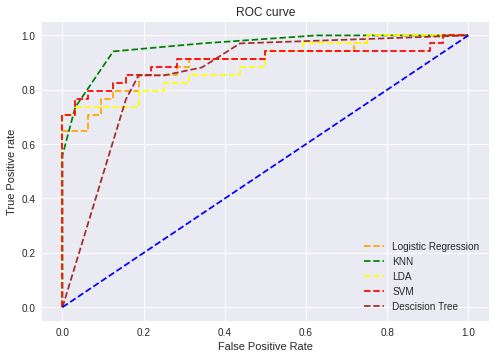

In [52]:
# logistic regression
model1 = LogisticRegression(solver='liblinear')
# knn
model2 = KNeighborsClassifier(n_neighbors=5)
# LDA
model3 = LinearDiscriminantAnalysis()
#SVM

model4 = svm.SVC(kernel='poly', degree=5, probability = True)
model5 = DecisionTreeClassifier(min_samples_leaf=4)

#probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print("AOC for Logistic Regression is :", auc_score1)
print("AOC for KNN is : ", auc_score2)
print("AOC for LDA is : ", auc_score3)
print("AOC for SVM is : ", auc_score4)
print("AOC for Decision Tree is : ", auc_score5)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='LDA')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='Descision Tree')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


For test_data:train data = 1:9, AOC is highest for LDA with 0.98
For test_data:train data = 1:3, AOC is highest for KNN with 0.95
For test_data:train data = 1:4, AOC is highest for KNN with 0.96